Version 1

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
sipp_2021 = pd.read_csv(r"C:\Users\shell\Python stuff\SIPP data\SIPP_2021_All_Relevant")
sipp_2020 = pd.read_csv(r"C:\Users\shell\Python stuff\SIPP data\SIPP_2020_All_Relevant")
sipp_2019 = pd.read_csv(r"C:\Users\shell\Python stuff\SIPP data\SIPP_2019_All_Relevant")
sipp_2018 = pd.read_csv(r"C:\Users\shell\Python stuff\SIPP data\SIPP_2018_All_Relevant")
sipp_2017 = pd.read_csv(r"C:\Users\shell\Python stuff\SIPP data\SIPP_2017_All_Relevant")
sipp_2016 = pd.read_csv(r"C:\Users\shell\Python stuff\SIPP data\SIPP_2016_All_Relevant")
sipp_2015 = pd.read_csv(r"C:\Users\shell\Python stuff\SIPP data\SIPP_2015_All_Relevant")
sipp_2014 = pd.read_csv(r"C:\Users\shell\Python stuff\SIPP data\SIPP_2014_All_Relevant")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\shell\\Python stuff\\SIPP data\\2021\\SIPP_2021_All_Relevant'

In [52]:
def median(dataframe, independent, dependent, point):
    '''
    Finds the median value of the dependent variable at the point given for the independent variable
    '''
    df = dataframe
    df = df[df[independent] == point]
    if df[dependent].median() > 0:
        return df[dependent].median()
    else:
        return 0

In [72]:
def median_sort_by(dataframe, independent, dependent):
    '''
    Sorts a dataframe such that it compares the indpendent variable to the median of the dependent variable
    '''
    df = dataframe
    df = df[(df['MONTHCODE'] == 1) & (df[dependent] > 0)]
    
    new_df = pd.DataFrame()
    new_df[independent] = range(df[independent].min(), (df[independent].max()+1))
    median_list = []
    for point in new_df[independent]:
        median_list.append(median(dataframe, independent, dependent, point))

    new_df['median ' + dependent] = median_list
    
    no_data_independent = []
    for x in new_df[independent]:
        if len(df[(df[dependent] == x)].index) < 10:
            no_data_independent.append(x)
    # new_df.drop(index=no_data_independent, axis='index', inplace=True)
    return new_df

In [75]:
def graph_regression(dataframe, year, independent, dependent, title, degree):
    '''
    Graphs the given dataframe and it's polynomial regression. 
    Dataframe must contain only the dependent and independent columns.
    '''
    coefficients = np.polyfit(x=dataframe[independent], y=dataframe[dependent], deg=degree)
    function = np.poly1d(coefficients)
    
    x=np.linspace(0, 87, 1000)
    y=function(x)
    
    # fractions have no practical use, they're used for graph cleanliness
    dependent_fraction = (dataframe[dependent].max() - dataframe[dependent].min())*0.05
    independent_fraction = (dataframe[independent].max() - dataframe[independent].min())*0.05
    
    plt.ylim(dataframe[dependent].min() - dependent_fraction, dataframe[dependent].max() + dependent_fraction)
    plt.xlim(dataframe[independent].min() - independent_fraction, dataframe[independent].max() + independent_fraction)
    plt.xlabel(independent)
    plt.ylabel(dependent)
    plt.title(title)
    
    color = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(x, y, color=color)
    plt.scatter(x=dataframe[independent], y=dataframe[dependent],s=20,label=year, color=color)
    
    plt.legend()
    plt.show

C:\Users\shell\AppData\Local\Temp\ipykernel_9880\3490118478.py:3: RankWarning: Polyfit may be poorly conditioned
  graph_regression(df_2014, 2014, df_2014.columns[0], df_2014.columns[1], 'median educational attainment by race', 3)
C:\Users\shell\AppData\Local\Temp\ipykernel_9880\2113341486.py:16: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(dataframe[dependent].min() - dependent_fraction, dataframe[dependent].max() + dependent_fraction)
C:\Users\shell\AppData\Local\Temp\ipykernel_9880\3490118478.py:4: RankWarning: Polyfit may be poorly conditioned
  graph_regression(df_2021, 2021, df_2021.columns[0], df_2021.columns[1], 'median educational attainment by race', 3)


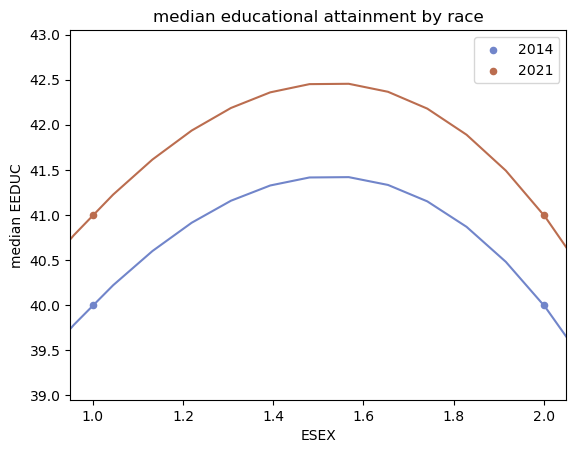

In [76]:
df_2014 = median_sort_by(sipp_2014, 'ESEX', 'EEDUC')
df_2021 = median_sort_by(sipp_2021, 'ESEX', 'EEDUC')
graph_regression(df_2014, 2014, df_2014.columns[0], df_2014.columns[1], 'median educational attainment by race', 3)
graph_regression(df_2021, 2021, df_2021.columns[0], df_2021.columns[1], 'median educational attainment by race', 3)